# CUstomer Classification for Ads targetting
This project aims to develop a customer classification model that can predict the likelihood of a customer making a purchase based on their demographic and financial characteristics

In [1]:
# importing the relevant packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Customer_history.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [4]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
X = data.iloc[:,[2,3]]
Y = data.iloc[:,4]

In [6]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state=40)

In [9]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(300, 2)
(300,)
(100, 2)
(100,)


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [41]:
X_train[:5]

array([[-0.98334377, -1.1271988 ],
       [ 1.23762906, -1.39076827],
       [ 0.75480888,  1.36206849],
       [ 1.52732117,  1.09849901],
       [-0.11426744, -0.01434989]])

## Modelling

In [14]:
#import sklearn
#dir(sklearn.svm)

In [15]:
from sklearn.svm import SVC

In [16]:
model = SVC(kernel = 'linear', random_state=0)
model.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

In [17]:
Y_pred = model.predict(X_test)
Y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [18]:
#dir(sklearn.metrics)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy = accuracy_score(Y_pred,Y_test)
print("Accuracy score:", accuracy)

Accuracy score: 0.79


## Vsualizing the model prediction

Text(0.5, 1.0, 'Training Data')

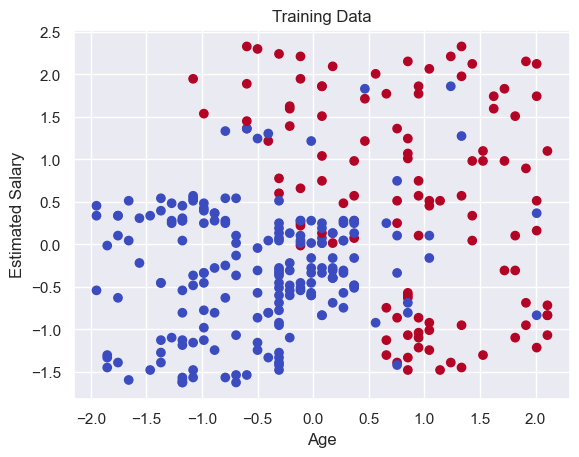

In [21]:
plt.scatter(X_train[:,0],X_train[:,1], c=Y_train, cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title("Training Data")

Text(0.5, 1.0, 'Test Data')

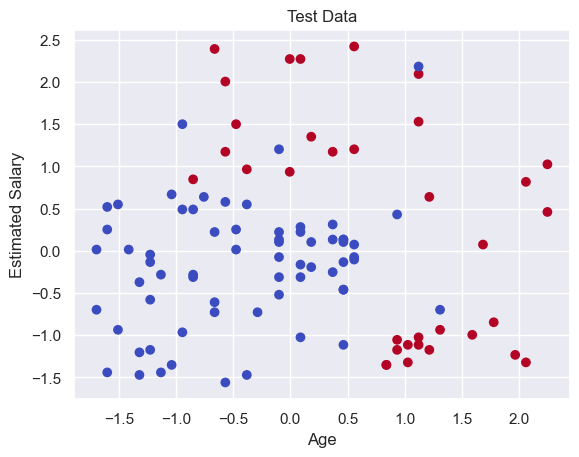

In [22]:
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, cmap="coolwarm")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Test Data")

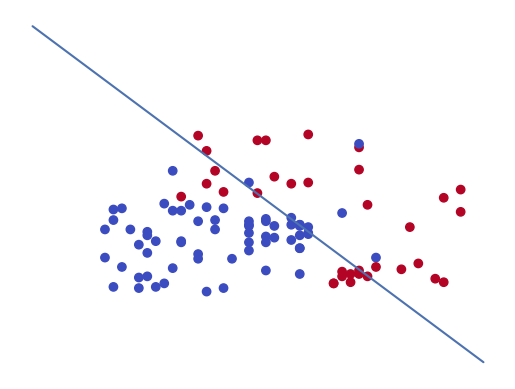

In [25]:
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, cmap="coolwarm")

#Hyper plane
w = model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace (-2.5,2.5)
yy = a*xx-(model.intercept_[0])/w[1]

#Plotting the hyper plane
plt.plot(xx,yy)
plt.axis("off"), plt.show();

## Using a non-linear plane

The Accuracy is:  0.79


Text(0.5, 1.0, 'Test Data')

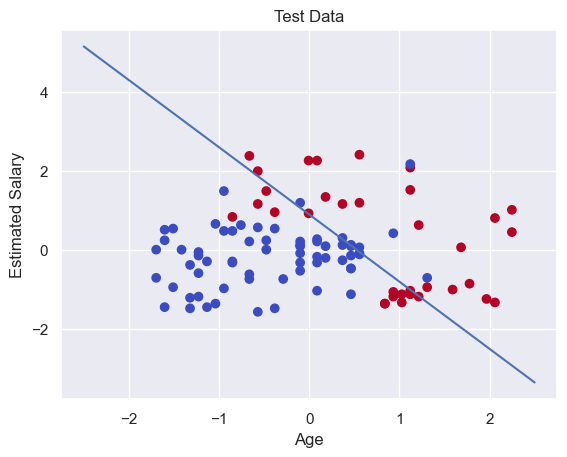

In [31]:
#Model 
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 0)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

#Accuracy measures
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("The Accuracy is: ", accuracy)

#Visualization 
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, cmap="coolwarm")

#Hyper plane
w = model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace (-2.5,2.5)
yy = a*xx-(model.intercept_[0])/w[1]

#Plotting the hyper plane
plt.plot(xx,yy)
#plt.axis("off"), plt.show()
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Test Data")

In [27]:
# RBF Model 
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state = 0)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

#Accuracy measures
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("The Accuracy is: ", accuracy)

The Accuracy is:  0.93


## The best performing model is RBF with an accuracy of 93%
The Radial Basis Function (RBF) tends to give a higher accuracy 

In [33]:
model.intercept_

array([-0.83435623])

In [34]:
model.coef_

array([[1.56514704, 0.91974812]])

Exporting the model

In [42]:
#coef_ogi = model.coef_ * scaler.scale_[0]/scaler.scale_[1]


- Now we have successfully classify the dataset based on which side of the hyper plane they fall into. points above the hyper plane are customers who puchased products whyle the ones below did not purchase 
- 

In [49]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
from joblib import dump, load

In [51]:
#saving the model to file
dump(model,"model.joblib")

['model.joblib']

Model Successfully saved

### Testing the saved model

In [52]:
loaded_model = load('model.joblib')

In [82]:
#loaded_model.intercept_

In [83]:
#loaded_model.coef_

In [84]:
new_data = pd.DataFrame({"Age":[34,31,28],"Salary":[50000,30000,27000]})
new_data

,Age,Salary
0,34,50000
1,31,30000
2,28,27000


In [85]:
from my_scaler import data_scaler

In [86]:
scaled_data = data_scaler(new_data)

In [87]:
loaded_model.predict(scaled_data)

array([1, 0, 0], dtype=int64)

## MODEL IS FULLY FUNCTIONAL 